In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;
from pandas.plotting import andrews_curves



#Lectura del archivo original
eventsData = pd.read_csv(r"C:\Users\brian\OneDrive - fi.uba.ar\Escritorio\Facultad\Datos\Trabajo-Practico-1\dataset\train.csv",low_memory = False)

In [200]:
eventsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [201]:
eventsData.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


Analisis de aquellos que no tienen localizacion

In [202]:
sinKeyword = eventsData[eventsData['keyword'].isna()]

In [203]:
sinKeyword.describe()

,id,target
count,61.000000,61.000000
mean,5349.606557,0.688525
std,5459.902088,0.466940
min,1.000000,0.000000
25%,23.000000,0.000000
50%,44.000000,1.000000
75%,10852.000000,1.000000
max,10873.000000,1.000000


Demasiados pocos como para que tenga sentido analizarlo

Analisis de la distribucion del largo de los tweets verdaderos

In [204]:
#Creo una columna con la cantidad de palabras
eventsData['cantidadDePalabras'] = eventsData['text'].apply(lambda x: len(x.split()))

In [205]:
#Filtro por aquellos con target =1
eventsDataTarget1 = eventsData[eventsData['target'] ==1]

In [206]:
#Calculos de datos auxiliares necesarios para el grafico
desviacionEstandar = eventsDataTarget1['cantidadDePalabras'].std()
promedio = eventsDataTarget1['cantidadDePalabras'].mean()
cantidadDeValoresUnicos = (eventsDataTarget1['cantidadDePalabras'].unique()).shape[0]

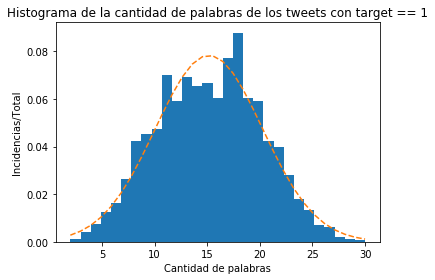

In [207]:
fig, ax = plt.subplots()
num_bins = cantidadDeValoresUnicos
n, bins, patches = ax.hist(eventsDataTarget1['cantidadDePalabras'], num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * desviacionEstandar)) *
     np.exp(-0.5 * (1 / desviacionEstandar * (bins - promedio))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Incidencias/Total')
ax.set_title('Histograma de la cantidad de palabras de los tweets con target == 1')

fig.tight_layout()
plt.show()

Ahora, se repetira el proceso, pero con aquellos con target == 0. Sinceramente no parece de mucha utilidad que sea una gaussiana.

In [208]:
#Filtro por aquellos con target =0
eventsDataTarget0 = eventsData[eventsData['target'] ==0]

In [209]:
#Calculos de datos auxiliares necesarios para el grafico
desviacionEstandar = eventsDataTarget1['cantidadDePalabras'].std()
promedio = eventsDataTarget1['cantidadDePalabras'].mean()
cantidadDeValoresUnicos = (eventsDataTarget1['cantidadDePalabras'].unique()).shape[0]

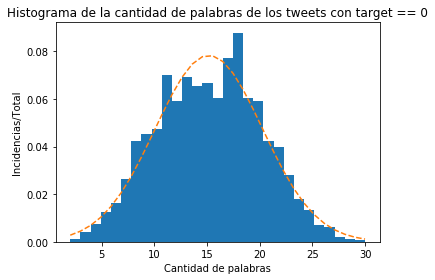

In [210]:
fig, ax = plt.subplots()
num_bins = cantidadDeValoresUnicos
n, bins, patches = ax.hist(eventsDataTarget1['cantidadDePalabras'], num_bins, density=1)
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * desviacionEstandar)) *
     np.exp(-0.5 * (1 / desviacionEstandar * (bins - promedio))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Incidencias/Total')
ax.set_title('Histograma de la cantidad de palabras de los tweets con target == 0')

fig.tight_layout()
plt.show()

Ahora vamos a trabajar contando tambien la cantidad de caracteres

In [211]:
#Primero agrego la columna en cuestion con la que voy a trabajar
eventsData['cantidadDeCaracteres'] = eventsData['text'].apply(lambda x: len(x)-x.count(" "))


In [212]:
#Para el primer grafico, me voy a quedar simplemente con las tres columnas que me interesan
eventsDataAux = eventsData[['cantidadDeCaracteres','cantidadDePalabras','target']]

In [215]:
#En este analisis voy a ver si hay correlacion entre cantidad de palabras, y el largo de las mismas
#Voy a empezar con los target = 1
eventsDataHex = eventsDataAux[eventsDataAux['target']==1]
eventsDataHex = eventsDataHex.groupby("cantidadDePalabras").agg({'cantidadDeCaracteres':'mean'})
eventsDataHex = eventsDataHex.reset_index()
eventsDataHex

,cantidadDePalabras,cantidadDeCaracteres
0,2,23.250000
1,3,24.153846
2,4,30.000000
3,5,38.461538
4,6,44.673077
5,7,52.120482
6,8,61.067669
7,9,68.307692
8,10,74.140940
9,11,79.357466


In [216]:
#Vamos a ver ahora si, en el caso de los ceros, hay variacion
eventsDataGex = eventsDataAux[eventsDataAux['target']==0]
eventsDataGex = eventsDataGex.groupby("cantidadDePalabras").agg({'cantidadDeCaracteres':'mean'})
eventsDataGex = eventsDataGex.reset_index()
eventsDataGex

,cantidadDePalabras,cantidadDeCaracteres
0,1,8.500000
1,2,19.333333
2,3,21.451613
3,4,28.582418
4,5,33.616667
5,6,38.246269
6,7,45.597484
7,8,49.925000
8,9,58.172727
9,10,60.308108
